In [1]:
import pandas as pd
import pandas_datareader.data as web
import plotly.express as px
import datetime

print("库导入成功！")

库导入成功！


In [2]:
# 设置数据获取的时间范围
start_date = datetime.datetime(2000, 1, 1)
end_date = datetime.datetime.now()

# 定义我们感兴趣的经济指标及其 FRED ID
# key 是我们自己取的好记的名字，value 是 FRED 官方的 ID
fred_series = {
    "联邦基金利率": "FEDFUNDS",
    "消费者价格指数(通胀)": "CPIAUCSL",
    "美国10年期国债收益率": "DGS10",
    "失业率": "UNRATE"
}

print("参数设置完毕，准备获取数据...")

参数设置完毕，准备获取数据...


In [3]:
# (之前获取数据的代码...)
df = web.DataReader(list(fred_series.values()), 'fred', start_date, end_date)
df = df.rename(columns=lambda x: [k for k, v in fred_series.items() if v == x][0])

# --- 新增代码：进行前向填充 ---
# .ffill() 就是 forward fill 的缩写
df_filled = df.ffill()

# --- 新增代码：移除所有剩余的 NaN ---
# 有时候数据序列的开头可能还是 NaN，dropna() 会把这些行删掉
df_cleaned = df_filled.dropna()

print("数据清洗完毕！")
display(df_cleaned.head())
display(df_cleaned.tail())

数据清洗完毕！


,联邦基金利率,消费者价格指数(通胀),美国10年期国债收益率,失业率
DATE,,,,
2000-01-03,5.45,169.3,6.58,4.0
2000-01-04,5.45,169.3,6.49,4.0
2000-01-05,5.45,169.3,6.62,4.0
2000-01-06,5.45,169.3,6.57,4.0
2000-01-07,5.45,169.3,6.52,4.0


,联邦基金利率,消费者价格指数(通胀),美国10年期国债收益率,失业率
DATE,,,,
2025-09-12,4.33,323.364,4.06,4.3
2025-09-15,4.33,323.364,4.05,4.3
2025-09-16,4.33,323.364,4.04,4.3
2025-09-17,4.33,323.364,4.06,4.3
2025-09-18,4.33,323.364,4.11,4.3


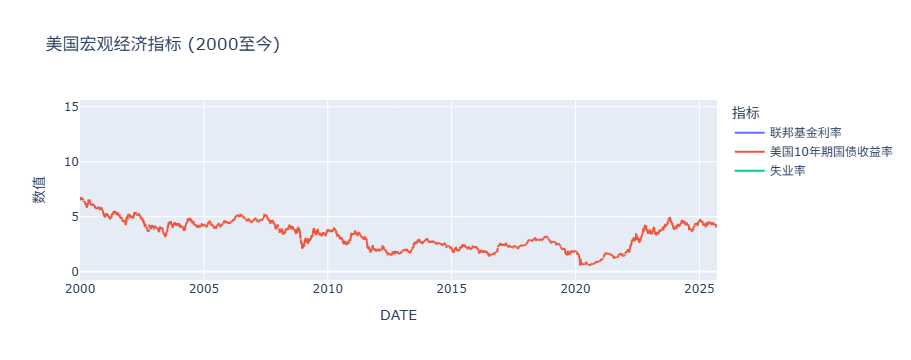

In [4]:
# 使用 Plotly Express 快速绘制交互式图表
# Plotly 会自动处理日期轴
fig = px.line(
    df, 
    y=["联邦基金利率", "美国10年期国债收益率", "失业率"],  # 选择要绘制的列
    title="美国宏观经济指标 (2000至今)",
    labels={"value": "数值", "variable": "指标", "date": "日期"}
)

# 显示图表
fig.show()

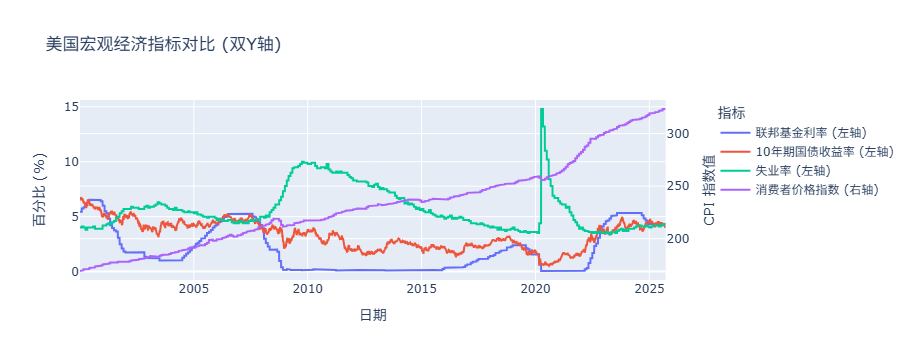

In [5]:
# 导入 plotly.graph_objects 库
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# -----------------
#  创建带双Y轴的图表
# -----------------

# 1. 初始化一个带次Y轴的图表对象
#    make_subplots 会创建一个可以容纳多个子图的画布，这里我们只用一个，但激活它的次Y轴
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 2. 在主Y轴上添加尺度较小的线 (利率和失业率)
#    我们使用 fig.add_trace() 来逐条添加曲线
fig.add_trace(
    go.Scatter(x=df_cleaned.index, y=df_cleaned['联邦基金利率'], name='联邦基金利率 (左轴)'),
    secondary_y=False, # False 表示添加到主Y轴
)

fig.add_trace(
    go.Scatter(x=df_cleaned.index, y=df_cleaned['美国10年期国债收益率'], name='10年期国债收益率 (左轴)'),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df_cleaned.index, y=df_cleaned['失业率'], name='失业率 (左轴)'),
    secondary_y=False,
)


# 3. 在次Y轴上添加尺度较大的线 (通胀)
fig.add_trace(
    go.Scatter(x=df_cleaned.index, y=df_cleaned['消费者价格指数(通胀)'], name='消费者价格指数 (右轴)'),
    secondary_y=True, # True 表示添加到次Y轴
)


# 4. 美化图表：添加标题和坐标轴标签
fig.update_layout(
    title_text="美国宏观经济指标对比 (双Y轴)",
    legend_title="指标"
)

# 为主Y轴设置标题
fig.update_yaxes(title_text="百分比 (%)", secondary_y=False)

# 为次Y轴设置标题
fig.update_yaxes(title_text="CPI 指数值", secondary_y=True)

# 为X轴设置标题
fig.update_xaxes(title_text="日期")


# 5. 显示图表
fig.show()